# finding basic structures (text, checkboxes, dots...)

- also, write to pdf (bottom)

### https://github.com/jsvine/pdfplumber

In [1]:
import pdfplumber

files = ["files/ex1.pdf", "files/ex2.pdf", "files/ex3.pdf", "files/ex4.pdf"]
#for x in files:
    #pdf = pdfplumber.open(x)
pdf = pdfplumber.open("ex1.pdf")

### show only checkboxes


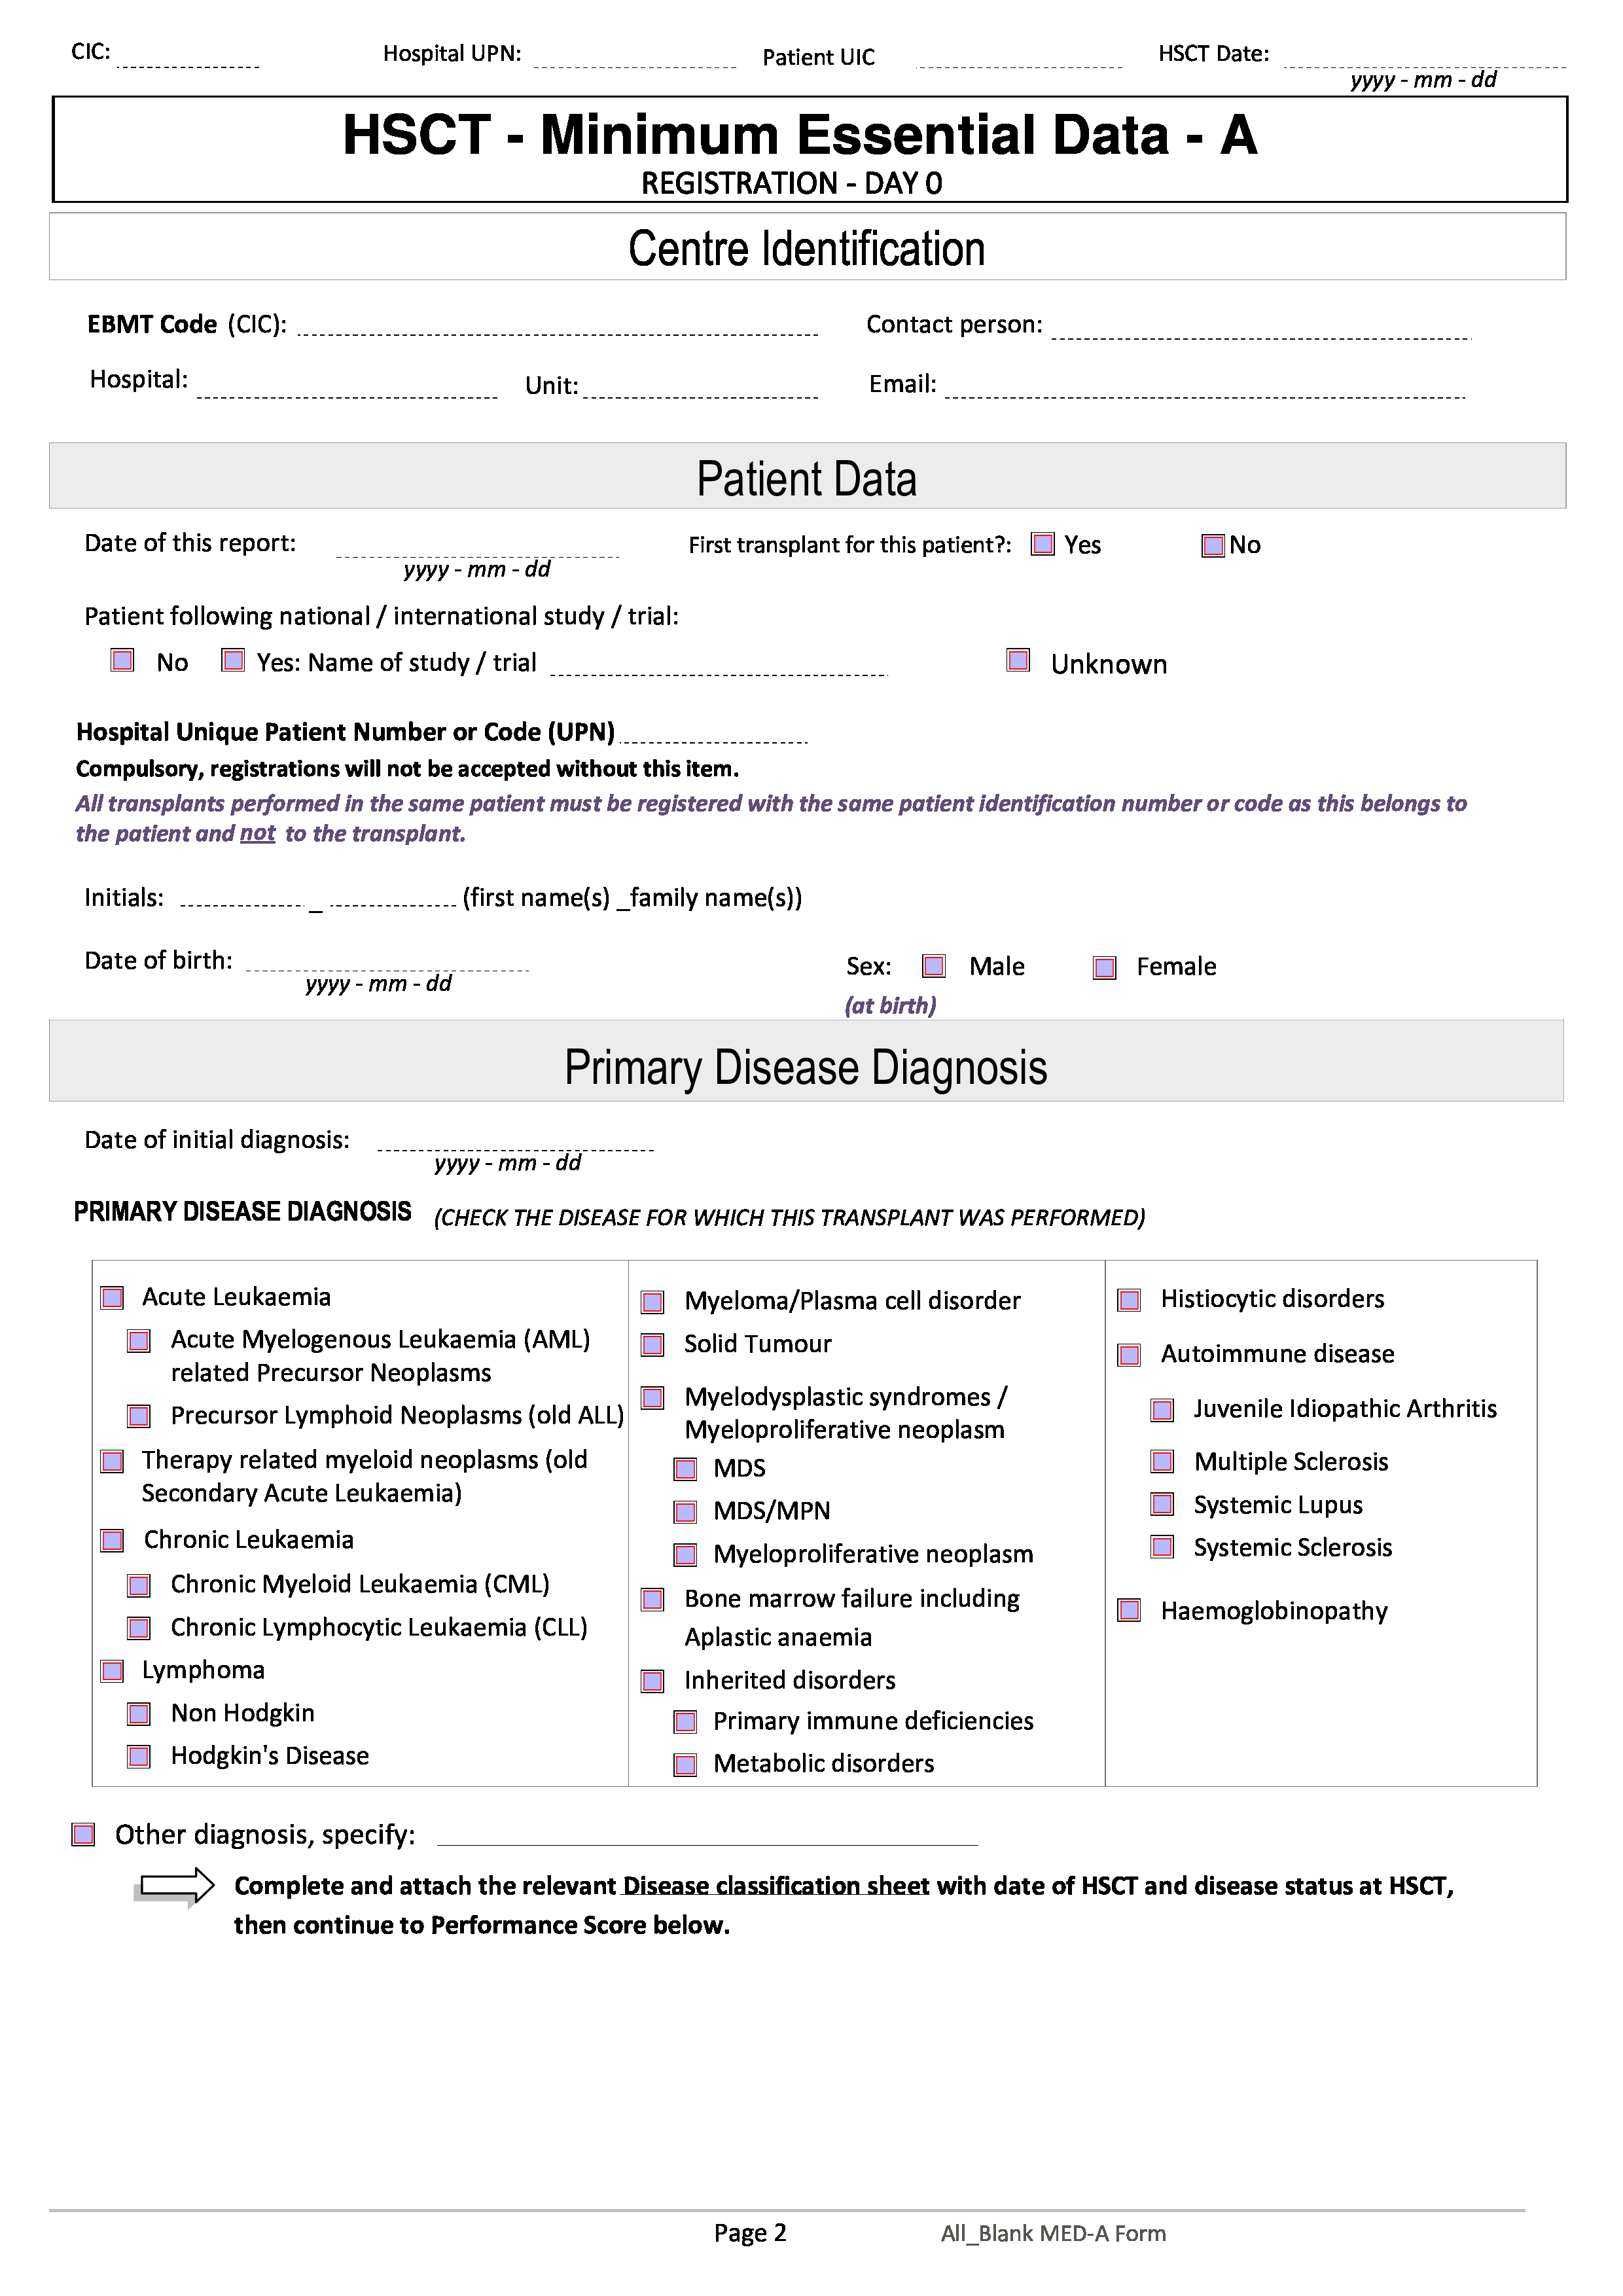

In [2]:
for page in pdf.pages:
    rects = page.rects
    img = page.to_image(resolution=300)
    
    ### filter each rect
    for rect in rects:
        w = abs(rect['x1'] - rect['x0'])
        h = abs(rect['y1'] - rect['y0'])
        
        ### checking if box
        if abs(w-h) < 1 and w > 2:    ###TODO
            img.draw_rect(rect, fill=(0,0,255,70), stroke_width=2)
            
            
    display(img)
    del img

------------

### show only dots


In [ ]:
for page in pdf.pages:
    rects = page.rects
    img = page.to_image(resolution=300)
    
    ### filter each rect
    for rect in rects:
        w = abs(rect['x1'] - rect['x0'])
        h = abs(rect['y1'] - rect['y0'])
        
        #print(rect)
        
        ### checking if dot
        if abs(h) < 5 :  ###TODO 
            img.draw_rects(rects, fill=(0,0,255,70), stroke_width=2)
            
            
    display(img)
    del img

------------

### show words

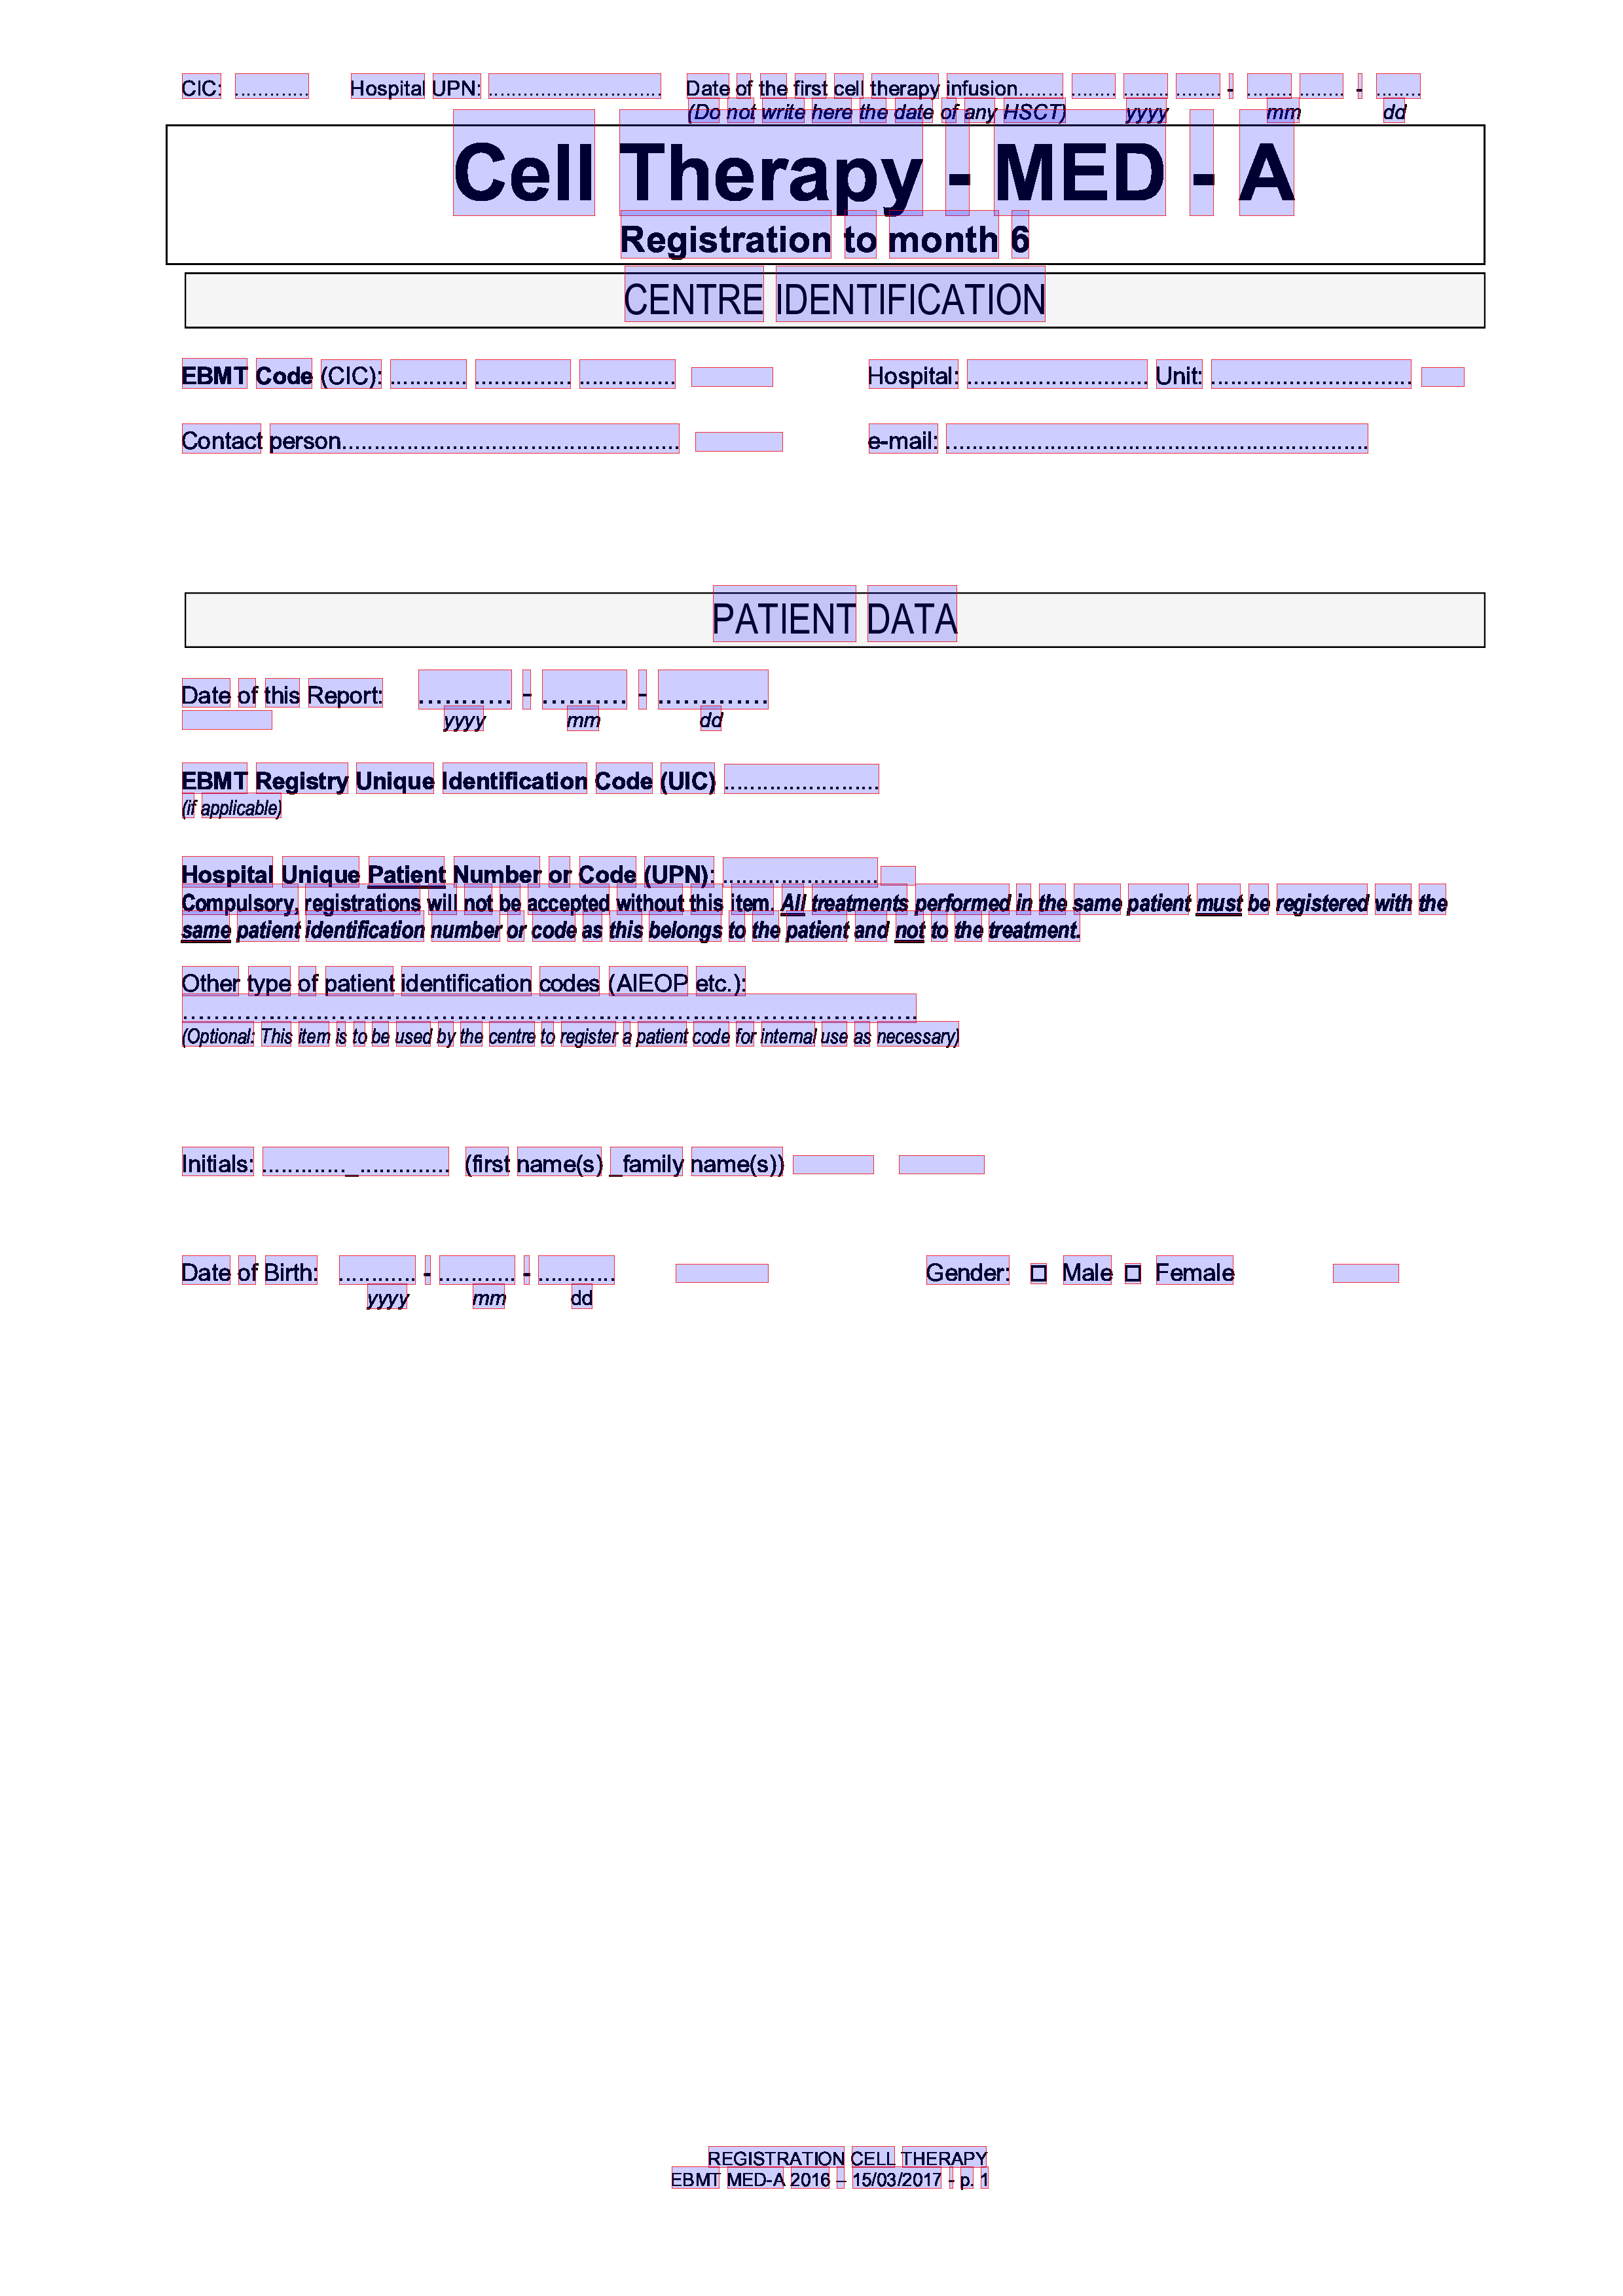

In [4]:
for page in pdf.pages:
    words = page.extract_words()
    img = page.to_image(resolution=300)
    
    
    ### TODO: group words?
    
    
    img.draw_rects(words)
    display(img)

    

-------------

In [5]:
words

[{'bottom': Decimal('36.725'),
  'text': 'CIC:',
  'top': Decimal('26.612'),
  'x0': Decimal('66.360'),
  'x1': Decimal('81.589')},
 {'bottom': Decimal('36.725'),
  'text': '.............',
  'top': Decimal('26.612'),
  'x0': Decimal('85.699'),
  'x1': Decimal('113.584')},
 {'bottom': Decimal('36.725'),
  'text': 'Hospital',
  'top': Decimal('26.612'),
  'x0': Decimal('128.286'),
  'x1': Decimal('156.186')},
 {'bottom': Decimal('36.725'),
  'text': 'UPN:',
  'top': Decimal('26.612'),
  'x0': Decimal('158.271'),
  'x1': Decimal('176.711')},
 {'bottom': Decimal('36.725'),
  'text': '..............................',
  'top': Decimal('26.612'),
  'x0': Decimal('178.747'),
  'x1': Decimal('242.838')},
 {'bottom': Decimal('36.725'),
  'text': 'Date',
  'top': Decimal('26.612'),
  'x0': Decimal('251.317'),
  'x1': Decimal('267.729')},
 {'bottom': Decimal('36.725'),
  'text': 'of',
  'top': Decimal('26.612'),
  'x0': Decimal('269.756'),
  'x1': Decimal('275.781')},
 {'bottom': Decimal('36.725'

In [6]:
#for x in range(len(words)):
   # print(words[x]['text'])

CIC:
.............
Hospital
UPN:
..............................
Date
of
the
first
cell
therapy
infusion........
........
........
........
-
........
........
-
........
(Do
not
write
here
the
date
of
any
HSCT)
yyyy
mm
dd
Cell
Therapy
-
MED
-
A
Registration
to
month
6
CENTRE
IDENTIFICATION
EBMT
Code
(CIC):
............
...............
...............
Hospital:
............................
Unit:
...............................
CENTRNR
UNIT
Contact
person....................................................
e-mail:
.................................................................
MEDNAME
PATIENT
DATA
...........
-
..........
-
.............
Date
of
this
Report:
DAT1STRE
yyyy
mm
dd
EBMT
Registry
Unique
Identification
Code
(UIC)
........................
(if
applicable)
Hospital
Unique
Patient
Number
or
Code
(UPN):
........................
UPN
Compulsory,
registrations
will
not
be
accepted
without
this
item.
All
treatments
performed
in
the
same
patient
must
be
registered
with
the
same
patien

## write on pdf according to word

In [20]:
import json

exportLabels = []
with open('example_json_filling.json', 'r') as f:
    val_dict = json.load(f)
    
for val in val_dict:
    exportLabels.append(val['exportLabel'])

print(exportLabels)

print(page.bbox)
print(page.bbox[3])
for x in range(len(words)):
    if 'e-mail' in words[x]['text']:
        print((words[x]['x0']))
        print(words[x]['x1'])
        print(words[x]['top'])
        print(words[x]['bottom'])
        xval = words[x]['x1'] - words[x]['x0']
        yval = words[x]['bottom'] - words[x]['top']
        print(type(xval))
        print(int(yval))
        print(842 - float(words[x]['top']) - float(yval))
        print(type(page.bbox[3]))
        break

['Hospital UPN', 'Date of this report', 'e-mail']
(Decimal('0'), Decimal('0'), Decimal('595'), Decimal('842'))
842
318.107
344.263
154.998
166.644
<class 'decimal.Decimal'>
11
675.356
<class 'decimal.Decimal'>


In [35]:
import io
from decimal import Decimal
import pdfrw
from reportlab.pdfgen import canvas


def run():
    canvas_data = get_overlay_canvas()
    form = merge(canvas_data, template_path="files/ex1_1.pdf")
    save(form, filename='merged_1.pdf')



def get_overlay_canvas() -> io.BytesIO:
    data = io.BytesIO()
    pdf = canvas.Canvas(data)
    pdf.drawString(x=(float)((words[x]['x0']) + (xval)) , y=(float)(page.bbox[3] - (words[x]['top'])) - (float)(yval) +1 , text='someone@gmail.com') ##locationa gore text yaziyor
   # pdf.drawString(x=318.107 + 26 , y=842 - 154.998 - 11 + 1, text='John')
    pdf.save()
    data.seek(0)
    return data


def merge(overlay_canvas: io.BytesIO, template_path: str) -> io.BytesIO:
    template_pdf = pdfrw.PdfReader(template_path)
    overlay_pdf = pdfrw.PdfReader(overlay_canvas)
    for page, data in zip(template_pdf.pages, overlay_pdf.pages):
        overlay = pdfrw.PageMerge().add(data)[0]
        pdfrw.PageMerge(page).add(overlay).render()
    form = io.BytesIO()
    pdfrw.PdfWriter().write(form, template_pdf)
    form.seek(0)
    return form


def save(form: io.BytesIO, filename: str):
    with open(filename, 'wb') as f:
        f.write(form.read())

if __name__ == '__main__':
    run()

[WARNING] tokens.py:221 Did not find PDF object (18446744072964735206, 0) (line=144, col=1, token='endobj')
[WARNING] tokens.py:221 Did not find PDF object (169777936, 0) (line=128, col=1, token='endobj')


In [34]:
data = io.BytesIO()
pdf = canvas.Canvas(data)
words[x]['x0'] + (xval)
#pdf.drawString(x=(words[x]['x0']) + (xval) , y=page.bbox[3] - (words[x]['top']) - (yval) , text='Willis')
#pdf.drawString(x=(float)((words[x]['x0']) + (xval)) , y=(float)(page.bbox[3] - (float)(words[x]['top']) - (float)(yval)) , text='Willis') 

Decimal('344.263')

-----

In [ ]:
### TODO: table deneme

In [ ]:
page = pdf.pages[1]
table_settings = \
{
    "vertical_strategy": "lines", 
    "horizontal_strategy": "text",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "join_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 3,
    "keep_blank_chars": True,
    "text_tolerance": 3,
    "text_x_tolerance": None,
    "text_y_tolerance": None,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": None,
    "intersection_y_tolerance": None,
}

page.extract_tables(table_settings=table_settings)